<a href="https://colab.research.google.com/github/vballah/vtb2106.github.io/blob/main/Vesta_Ballah_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Solution and Approach For Multi_Label, Multi-Target Classification Problem


## Brief Overview
To broaden my knowledge about cars, model, make, trim and how it affets the Dealer listing price, I had to read the following as per the write up instructions:
- https://en.wikipedia.org/wiki/Cadillac_XT5
- https://en.wikipedia.org/wiki/Jeep_Grand_Cherokee_%28WK2%29

Regression was implemented because we had two response(predictors) od which one was continuos and the next was categorical. The continuos variable was the Dealer listing price that had 26 independent vaiables as predictors.

## Want to run the examples below interactively? (optional)
1. Install the the following imports(library dependencies) below the references tab
2. Make sure you have all relevant files in your current directory
3. Click the run tab and the cells should run with the desire outputs


## References

-https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html
-https://medium.com/analytics-vidhya/how-to-handle-missing-values-----cbd03fb79ef8#:~:text=If%20missing%20values%20in%20target,take%20mean%20for%20integer%20column.
-https://www-users.cs.umn.edu/~kumar001/dmbook/index.php#item4
-https://www.pyimagesearch.com/2019/01/21/regression-with-keras
-https://www.kite.com/python/answers/how-to-use-numpy-where-with-multiple-conditions-in-python
https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
https://www.datacamp.com/community/tutorials/categorical-data
https://www.kaggle.com/shama123/house-price-advanced-regression-techniques
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
https://www.section.io/engineering-education/house-price-prediction/
https://examples.yourdictionary.com/negative-correlation-examples.html
https://www.truebil.com/blog/7-factors-that-influence-the-price-of-a-used-car
https://stackabuse.com/deep-learning-in-keras-data-preprocessing
https://www.youtube.com/watch?v=OJ56gfXwn5o&ab_channel=JaziDesignsJaziDesigns

##Import necessary Library 


In [ ]:
!python -m pip install -U notebook-as-pdf


In [318]:
!pyppeteer-install

[W:pyppeteer.chromium_downloader] start chromium download.
Download may take a few minutes.
100% 108773488/108773488 [00:00<00:00, 135309443.78it/s]
[W:pyppeteer.chromium_downloader] 
chromium download done.
[W:pyppeteer.chromium_downloader] chromium extracted to: /root/.local/share/pyppeteer/local-chromium/588429


In [ ]:

!jupyter nbconvert --to latex Vesta_Ballah_Submission.ipynb

In [329]:
!jupyter nbconvert Vesta_Ballah_Submission.ipynb --to pdf

[NbConvertApp] WARNING | pattern u'Vesta_Ballah_Submission.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inpla

In [ ]:
!pip install feature_engine

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor


In [ ]:
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_log_error

import multiprocessing

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# feature selection based on low variance
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_string_dtype
# feature selection based on low variance
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder
import os 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



## The Data
The training data comprises of Used Vehicles of a certain make and model and the task is to predict the dealer listing price and vehicle trim given the other values that are the predictors.
the data will be explore a bit to learn some features from it and understand what can be manipulated to get a good train, test score on the response variable.
feature engineering, data wrongling and manipulation will be implemented to aid in better performance.

The data is numeric and categorical, thus data will have to be split to get the best statistical inference from the continuos and best features from the categorical


# Download the Dataset

In [ ]:
train = pd.read_csv('/content/Training_DataSet.csv', delimiter=',')


In [ ]:
test = pd.read_csv('/content/Test_Dataset.csv', delimiter=',')

In [ ]:

# split the dependent variable from the features
ID = train.drop('ListingID', axis=1, inplace=True)
ID2 = test.drop('ListingID', axis=1, inplace=True)

# Exploratory Data Analysis

In [ ]:
train.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,False,White,Black,4X4,3.6L V6,"['Adaptive Cruise Control', 'Antilock Brakes',...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",8.600069,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,True,Black,NaN,NaN,NaN,NaN,Gasoline,"1 Owner, Buyback Protection Eligible",2.920127,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0


In [ ]:
print('The shape of our dataset is:', train.shape)

The shape of our dataset is: (6298, 29)


In [ ]:
print('Number of instances = %d' % (train.shape[0]))
print('Number of attributes = %d' % (train.shape[1]))

Number of instances = 6298
Number of attributes = 29


dataset comprises of 6298 observations and 29 characteristics out of which three is dependent or response variable and rest 26 are independent variables or predictor variables

In [ ]:
print('The shape of our test dataset is:', test.shape)

The shape of our test dataset is: (1000, 27)


In [ ]:
#explore data before cleaning
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             




Upon inspection, the booleans will be changed to int and the Zipcode will be change to objects and not floats



 



In [ ]:
train.dtypes

ListingID                 int64
SellerCity               object
SellerIsPriv               bool
SellerListSrc            object
SellerName               object
SellerRating            float64
SellerRevCnt              int64
SellerState              object
SellerZip               float64
VehBodystyle             object
VehCertified               bool
VehColorExt              object
VehColorInt              object
VehDriveTrain            object
VehEngine                object
VehFeats                 object
VehFuel                  object
VehHistory               object
VehListdays             float64
VehMake                  object
VehMileage              float64
VehModel                 object
VehPriceLabel            object
VehSellerNotes           object
VehType                  object
VehTransmission          object
VehYear                   int64
Vehicle_Trim             object
Dealer_Listing_Price    float64
dtype: object

In [ ]:
print("Columns labels are:", train.columns.values)

Columns labels are: ['ListingID' 'SellerCity' 'SellerIsPriv' 'SellerListSrc' 'SellerName'
 'SellerRating' 'SellerRevCnt' 'SellerState' 'SellerZip' 'VehBodystyle'
 'VehCertified' 'VehColorExt' 'VehColorInt' 'VehDriveTrain' 'VehEngine'
 'VehFeats' 'VehFuel' 'VehHistory' 'VehListdays' 'VehMake' 'VehMileage'
 'VehModel' 'VehPriceLabel' 'VehSellerNotes' 'VehType' 'VehTransmission'
 'VehYear' 'Vehicle_Trim' 'Dealer_Listing_Price']


In [ ]:
#the targets in this datasets are:
Dealer_will_based_on_Trim = train[['Vehicle_Trim','Dealer_Listing_Price']]
Dealer_will_based_on_Trim.head(3)

,Vehicle_Trim,Dealer_Listing_Price
0,High Altitude,30990.0
1,NaN,34860.0
2,Laredo,23249.0


In [ ]:
#desire output for prediction:
pred = train[['ListingID','Vehicle_Trim', 'Dealer_Listing_Price']]
pred.head(3)

,ListingID,Vehicle_Trim,Dealer_Listing_Price
0,3287,High Altitude,30990.0
1,3920,NaN,34860.0
2,4777,Laredo,23249.0


In [ ]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6293    False
6294    False
6295    False
6296    False
6297    False
Length: 6298, dtype: bool

In [ ]:
#summary statistics for train 
train.describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,6.298000e+03,6298.000000,6298.000000,6296.000000,6296.000000,6296.000000,6298.000000,6246.000000
mean,4.318130e+06,4.138346,434.565576,45234.211722,56.143670,26369.364358,2016.792633,32265.053314
std,2.486031e+06,1.188033,1274.257411,20380.478191,68.301329,13036.568712,1.206566,7538.339005
min,3.287000e+03,0.000000,0.000000,1105.000000,0.293102,0.000000,2015.000000,18289.000000
25%,2.178112e+06,4.000000,28.000000,28806.000000,12.998391,16835.000000,2015.000000,26900.000000
50%,4.298122e+06,4.600000,126.000000,46410.000000,33.463484,26181.000000,2017.000000,31455.500000
75%,6.488249e+06,4.800000,401.000000,60126.000000,74.139769,36468.500000,2018.000000,35991.000000
max,8.620012e+06,5.000000,14635.000000,99654.000000,820.684375,83037.000000,2019.000000,89500.000000


The describe() function is very handy in getting various summary statistics for quantatives variables

This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

Notable large difference in predictors 75% and max for, sellerRevCnt, Vehicle listing days, Vehicle Mileage which could cause outliers in the dataset. The attributes are quantitatives. I will further explore the relationship to decide whether to drop those columns or fill with the mean



In [ ]:
#now we can look at the standard deviation for the quant variable in depth
for col in train.columns:
    if is_numeric_dtype(train[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % train[col].mean())
        print('\t Standard deviation = %.2f' % train[col].std())
        print('\t Minimum = %.2f' % train[col].min())
        print('\t Maximum = %.2f' % train[col].max())

ListingID:
	 Mean = 4318129.97
	 Standard deviation = 2486030.99
	 Minimum = 3287.00
	 Maximum = 8620012.00
SellerIsPriv:
	 Mean = 0.00
	 Standard deviation = 0.05
	 Minimum = 0.00
	 Maximum = 1.00
SellerRating:
	 Mean = 4.14
	 Standard deviation = 1.19
	 Minimum = 0.00
	 Maximum = 5.00
SellerRevCnt:
	 Mean = 434.57
	 Standard deviation = 1274.26
	 Minimum = 0.00
	 Maximum = 14635.00
SellerZip:
	 Mean = 45234.21
	 Standard deviation = 20380.48
	 Minimum = 1105.00
	 Maximum = 99654.00
VehCertified:
	 Mean = 0.23
	 Standard deviation = 0.42
	 Minimum = 0.00
	 Maximum = 1.00
VehListdays:
	 Mean = 56.14
	 Standard deviation = 68.30
	 Minimum = 0.29
	 Maximum = 820.68
VehMileage:
	 Mean = 26369.36
	 Standard deviation = 13036.57
	 Minimum = 0.00
	 Maximum = 83037.00
VehYear:
	 Mean = 2016.79
	 Standard deviation = 1.21
	 Minimum = 2015.00
	 Maximum = 2019.00
Dealer_Listing_Price:
	 Mean = 32265.05
	 Standard deviation = 7538.34
	 Minimum = 18289.00
	 Maximum = 89500.00


zip will be converted to objects

In [ ]:
#sanity check on only train for target variables
train.Vehicle_Trim.shape

(6298,)

In [ ]:
#sanity check on only training for target variables
train.Dealer_Listing_Price.shape


(6298,)

In [ ]:
#check for duplicate rows in training
dups = train.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
train.loc[[11,28]]

Number of duplicate rows = 0


,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
11,17626,Laurel,False,Inventory Command Center,Carbiz Greater Washington DC,4.7,69,MD,20723.0,SUV,False,Brilliant Black Crystal Pearlcoat,Black,4WD,V6 Cylinder Engine 3.0L,"['A/C,8-Speed A/T,4x4,4-Wheel Disc Brakes,4-Wh...",Diesel,"1 Owner, Buyback Protection Eligible",28.315313,Jeep,32858.0,Grand Cherokee,Good Deal,&#x3D;&#x3D;&#x3D;&#x3D;&#x3D;&#x3D;: *Certifi...,Used,8-Speed A/T,2015,Limited,28000.0
28,39482,Indianapolis,False,Digital Motorworks (DMi),CarMax Indianapolis,3.3,16,IN,46280.0,SUV,False,White,Black,4WD,3.6L V6 24V MPFI DOHC Flexible Fuel,"['1st and 2nd row curtain head airbags', '4-wh...",E85 Flex Fuel,"1 Owner, Buyback Protection Eligible",7.840174,Jeep,31486.0,Grand Cherokee,Good Deal,CarMax makes car buying easy and hassle-free. ...,Used,8-Speed Automatic,2015,Altitude,30998.0


## Missing Data Info

In [ ]:
train.isnull().values.any()

True

In [ ]:
missing_values = pd.DataFrame({
    'Column': train.columns.values,
    '# of missing values': train.isna().sum().values,
    '% of missing values': 100 * train.isna().sum().values / len(train),
})

missing_values = missing_values[missing_values['# of missing values'] > 0]
print(missing_values.sort_values(by='# of missing values', 
                                 ascending=False
                                ).reset_index(drop=True))


                  Column  # of missing values  % of missing values
0            VehColorInt                  728            11.559225
1           Vehicle_Trim                  405             6.430613
2          VehDriveTrain                  401             6.367101
3              VehEngine                  361             5.731978
4          VehPriceLabel                  285             4.525246
5               VehFeats                  275             4.366466
6         VehSellerNotes                  243             3.858368
7             VehHistory                  201             3.191489
8        VehTransmission                  197             3.127977
9            VehColorExt                   73             1.159098
10  Dealer_Listing_Price                   52             0.825659
11         SellerListSrc                    2             0.031756
12             SellerZip                    2             0.031756
13               VehFuel                    2             0.03

Vehicle exterior have the highest amount of missing values, followed by VehDrive Train, Vehicle Engines, VehFeats and Price label. I will explore how closely corelated are those Columns with our response variables before I decide whether to delete or fill in with the mode. The highest percentage of missing values are categorical variables so far. The high missing values will be deleted upon feature selection but will be fill with the modes for now

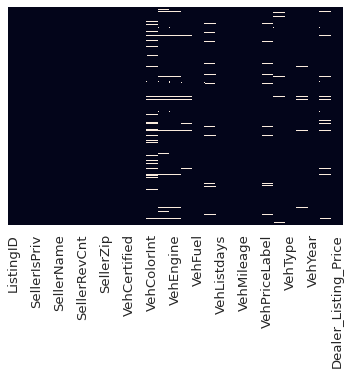

In [319]:
#visual check of  missing values in dataset
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

VehColorInt,Engine, fuel, and price label have the highest amount of missiong data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
# feature selection based on low variance
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_string_dtype
# feature selection based on low variance
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder
import os 



In [ ]:

#visual check of  missing values in dataset
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

The highest percentage goes to the VehColor int, which could cause outliers

## Statistical Inference, amputation, and visualization on numerical and Categorical data

In [ ]:
feature_types = train.dtypes.astype(str).value_counts().to_frame('count').rename_axis('datatype').reset_index()



In [ ]:
px.bar(feature_types, x='datatype', y='count', color='datatype')\
    .update_layout(showlegend=False)\
    .update_layout(title={'text': 'Data Types', 'x': .5})

In [ ]:
feature_type = test.dtypes.astype(str).value_counts().to_frame('count').rename_axis('datatype').reset_index()


In [ ]:
px.bar(feature_type, x='datatype', y='count', color='datatype')\
    .update_layout(showlegend=False)\
    .update_layout(title={'text': 'Data Types', 'x': .5})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



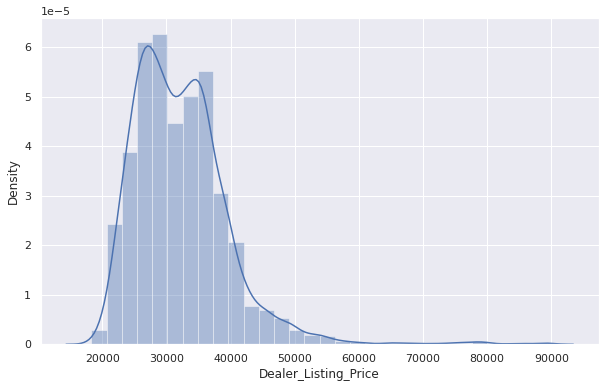

In [ ]:

plt.figure(figsize=(10,6))
sns.distplot(train['Dealer_Listing_Price'],bins=30)

the values of Dealer price listed follows a normal distribution with a mean around 30k, outliers are a bit minimal

In [ ]:
train.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,False,White,Black,4X4,3.6L V6,"['Adaptive Cruise Control', 'Antilock Brakes',...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",8.600069,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,True,Black,NaN,NaN,NaN,NaN,Gasoline,"1 Owner, Buyback Protection Eligible",2.920127,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0


In [ ]:
features = ['SellerRating', 'SellerRevCnt', 'SellerZip','VehMileage', 'VehYear']
plt.figure(figsize=(30, 70))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(train):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=train, x=features, y='Dealer_Listing_Price', color ="blue")
    plt.xlabel(features)
    plt.ylabel('Dealer_Listing_Price')
    
    
sns.despine()

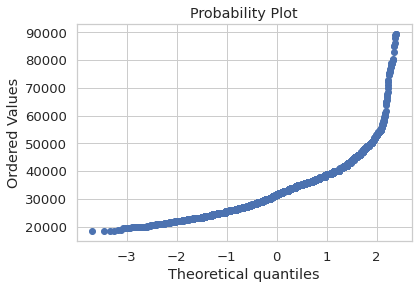

In [ ]:
res = stats.probplot(train['Dealer_Listing_Price'], plot=plt)

the Quantile-Quantile plot proves that my sample data are postively skewed to the right.
Looking at this plots tells us that we will have more outliers in larger values for dealer price that smaller ones

In [ ]:
print('Covariance:')
train.cov()

Covariance:


,ListingID,SellerIsPriv,SellerRating,SellerRevCnt,SellerZip,VehCertified,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
ListingID,6.180350e+12,-1179.262762,45624.583648,-1.478765e+06,-1.729020e+08,-8494.963954,1.220972e+06,7.636784e+07,-64411.300599,-2.226933e+08
SellerIsPriv,-1.179263e+03,0.002218,-0.009201,-9.661614e-01,3.860689e+00,-0.000501,-3.339081e-02,6.483701e+00,-0.000809,-4.382345e+00
SellerRating,4.562458e+04,-0.009201,1.411423,2.205157e+02,5.506996e+02,0.017864,6.881970e-01,-4.256763e+02,0.086212,4.525452e+02
SellerRevCnt,-1.478765e+06,-0.966161,220.515740,1.623732e+06,6.850822e+05,-6.609108,-1.454776e+03,-1.084694e+05,45.421096,-2.053068e+05
SellerZip,-1.729020e+08,3.860689,550.699581,6.850822e+05,4.153639e+08,406.005048,6.585477e+04,-2.948748e+07,4391.689291,2.114506e+07
VehCertified,-8.494964e+03,-0.000501,0.017864,-6.609108e+00,4.060050e+02,0.174573,1.016673e+00,-4.887694e+02,0.064674,4.629147e+02
VehListdays,1.220972e+06,-0.033391,0.688197,-1.454776e+03,6.585477e+04,1.016673,4.665072e+03,-6.438718e+04,1.895079,1.065951e+04
VehMileage,7.636784e+07,6.483701,-425.676299,-1.084694e+05,-2.948748e+07,-488.769388,-6.438718e+04,1.699521e+08,-8155.567935,-5.518771e+07
VehYear,-6.441130e+04,-0.000809,0.086212,4.542110e+01,4.391689e+03,0.064674,1.895079e+00,-8.155568e+03,1.455801,5.471927e+03
Dealer_Listing_Price,-2.226933e+08,-4.382345,452.545217,-2.053068e+05,2.114506e+07,462.914733,1.065951e+04,-5.518771e+07,5471.927338,5.682655e+07


In [ ]:
print('Correlation:')
train.corr()

Correlation:


,ListingID,SellerIsPriv,SellerRating,SellerRevCnt,SellerZip,VehCertified,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
ListingID,1.000000,-0.010071,0.015448,-0.000467,-0.003412,-0.008178,0.007190,0.002356,-0.021474,-0.011882
SellerIsPriv,-0.010071,1.000000,-0.164429,-0.016098,0.004021,-0.025455,-0.010378,0.010558,-0.014243,-0.012292
SellerRating,0.015448,-0.164429,1.000000,0.145665,0.022754,0.035988,0.008485,-0.027481,0.060144,0.050542
SellerRevCnt,-0.000467,-0.016098,0.145665,1.000000,0.026376,-0.012414,-0.016713,-0.006529,0.029543,-0.021295
SellerZip,-0.003412,0.004021,0.022754,0.026376,1.000000,0.047686,0.047309,-0.111080,0.178597,0.138126
VehCertified,-0.008178,-0.025455,0.035988,-0.012414,0.047686,1.000000,0.035631,-0.089768,0.128290,0.146652
VehListdays,0.007190,-0.010378,0.008485,-0.016713,0.047309,0.035631,1.000000,-0.072298,0.022996,0.020701
VehMileage,0.002356,0.010558,-0.027481,-0.006529,-0.111080,-0.089768,-0.072298,1.000000,-0.518410,-0.562846
VehYear,-0.021474,-0.014243,0.060144,0.029543,0.178597,0.128290,0.022996,-0.518410,1.000000,0.601120
Dealer_Listing_Price,-0.011882,-0.012292,0.050542,-0.021295,0.138126,0.146652,0.020701,-0.562846,0.601120,1.000000


In [ ]:
#fuel type and Mileage
kf = train.groupby("VehFuel")['VehMileage'].agg(["sum", "min","mean", "max"]).reset_index()
kf.columns = ['Vehicle Fuel', 'Total Mileage', 'Min Mileage', 'Avg Mileage', 'Max Mileage']
kf

,Vehicle Fuel,Total Mileage,Min Mileage,Avg Mileage,Max Mileage
0,Diesel,1297889.0,0.0,31655.829268,49730.0
1,E85 Flex Fuel,11258463.0,1.0,32823.507289,49974.0
2,Gasoline,153066842.0,0.0,25943.532542,83037.0
3,Unknown,323317.0,19857.0,32331.700000,45000.0


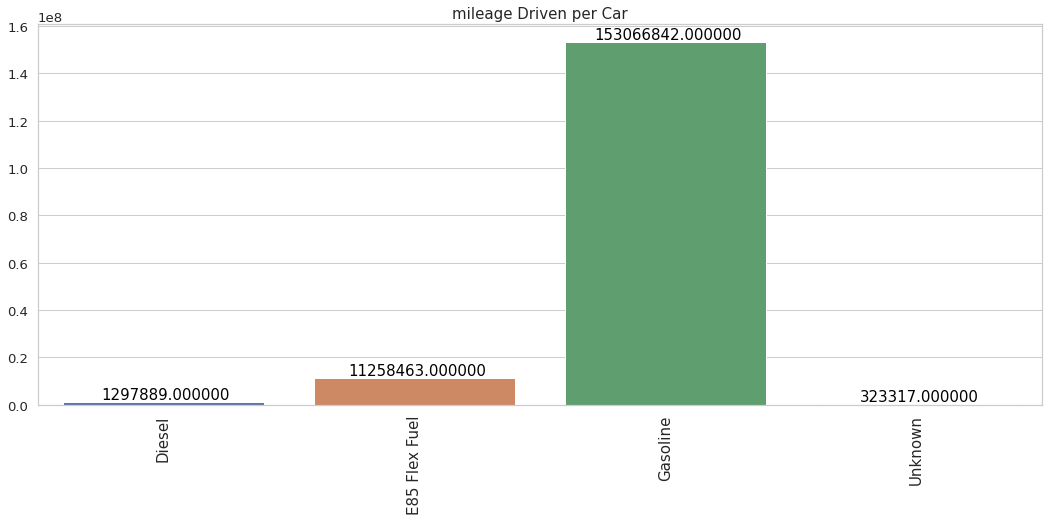

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x='Vehicle Fuel', y='Total Mileage', data=kf)
for p in graph.patches:
   graph.annotate('{:01f}'.format(p.get_height()),
    (p.get_x()+0.41, p.get_height()),
    ha='center',va='bottom',color='black', size= 15) 
plt.title('mileage Driven per Car', size= 15)
plt.xticks(size = 15, rotation = 90)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Some outliers as the unknown fuel type isn't consume much

Text(0, 0.5, 'Dealer_Listing_Price')

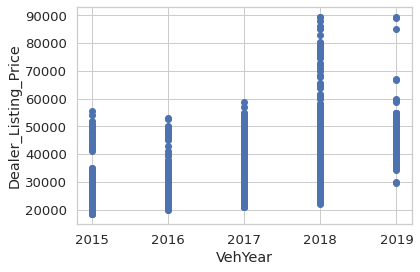

In [ ]:
target_var = train['Dealer_Listing_Price']

plot1 = plt.figure(1)
plt.scatter(train['VehYear'], target_var)
plt.xlabel('VehYear')
plt.ylabel('Dealer_Listing_Price')

Dealer price increases linearly with the VehYear while Dealer price decreases linearly with Vehicle mileage

Highly corelated as VehYear increases linearly with price

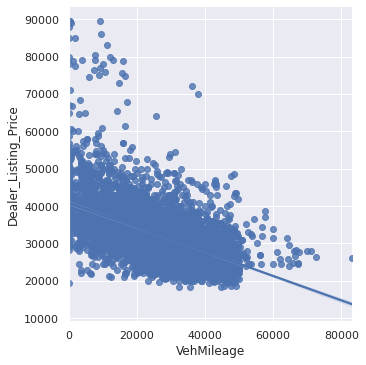

In [ ]:
#visual representation of the Vehicle Mileage and Dealer Listing Price
sns.lmplot(data= train,  x='VehMileage', y='Dealer_Listing_Price')

Mileage decreases linearly with price, which is a good predictor of the dealer price

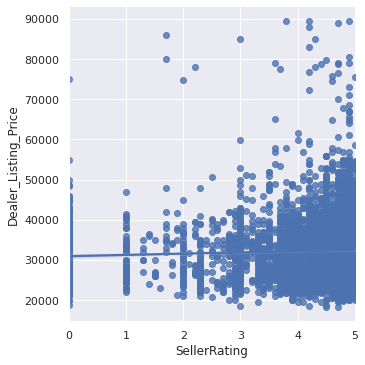

In [ ]:
#visual representation of the Vehicle Mileage and Dealer Listing Price
sns.lmplot(data= train,  x='SellerRating', y='Dealer_Listing_Price')

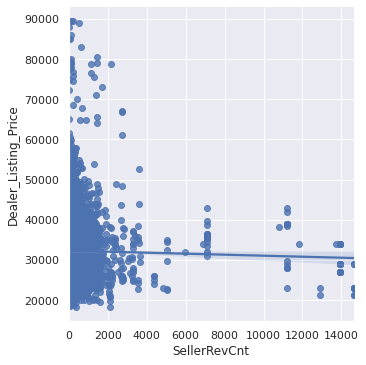

In [ ]:
#visual representation of the Vehicle Mileage and Dealer Listing Price
sns.lmplot(data= train,  x='SellerRevCnt', y='Dealer_Listing_Price')

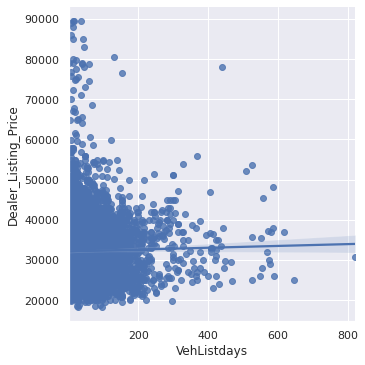

In [ ]:
#visual representation of the Vehicle Mileage and Dealer Listing Price
sns.lmplot(data= numerical_data,  x='VehListdays', y='Dealer_Listing_Price')

In [ ]:
#top 10 Trim by Frequency

trims = train['Vehicle_Trim'].value_counts().to_frame().reset_index().head(10)
trims.columns = ['Trim_Level', 'Frequency']
trims

,Trim_Level,Frequency
0,Limited,1912
1,Premium Luxury,747
2,Laredo,704
3,Luxury,645
4,Overland,381
5,Altitude,325
6,Summit,242
7,Trailhawk,178
8,Base,159
9,Platinum,131


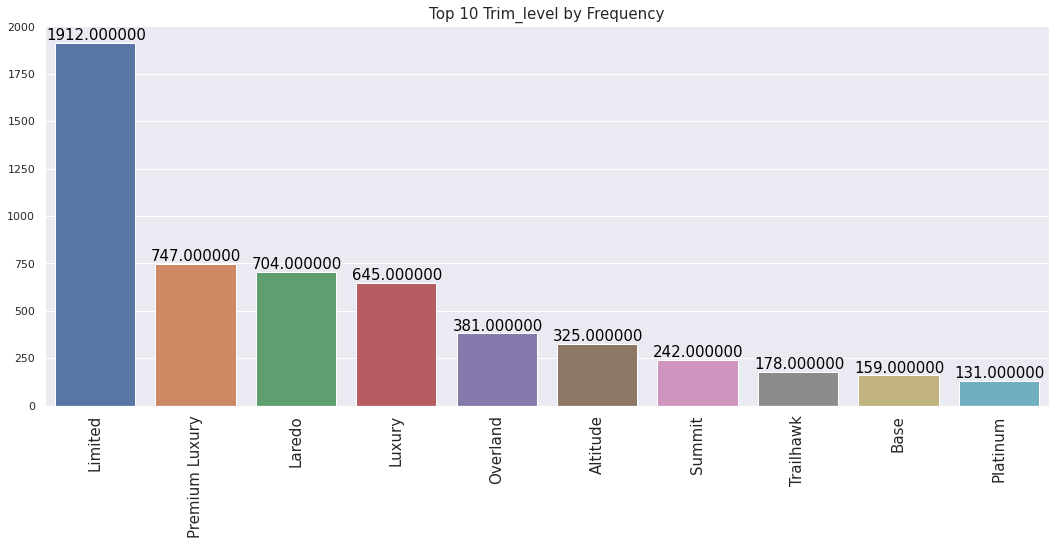

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x='Trim_Level', y='Frequency', data=trims)
for p in graph.patches:
   graph.annotate('{:01f}'.format(p.get_height()),
    (p.get_x()+0.41, p.get_height()),
    ha='center',va='bottom',color='black', size= 15) 
plt.title('Top 10 Trim_level by Frequency', size= 15)
plt.xticks(size = 15, rotation = 90)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
price_label =  train['VehPriceLabel'].value_counts().to_frame().reset_index().head(10)
price_label.columns = ['VehPriceLabel', 'Frequency']
price_label

,VehPriceLabel,Frequency
0,Good Deal,4488
1,Great Deal,844
2,Fair Price,681


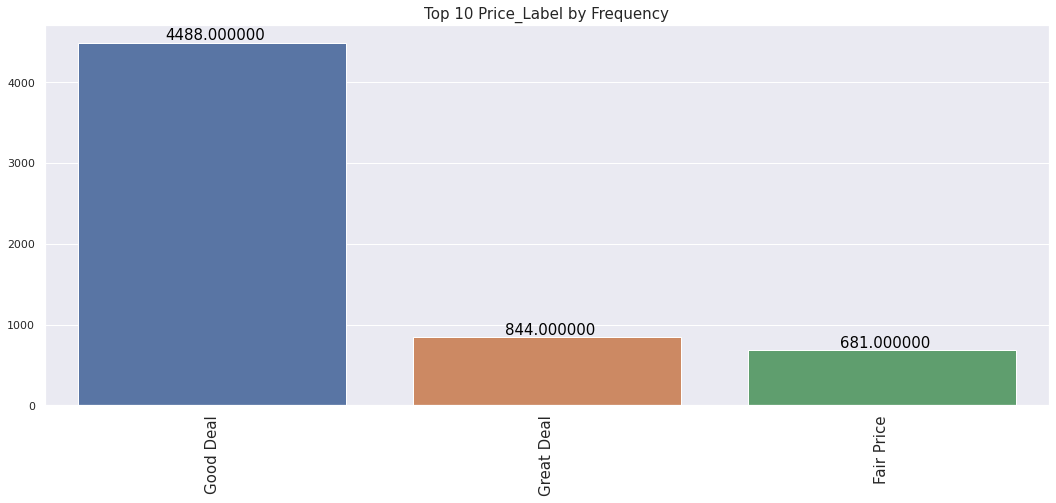

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x='VehPriceLabel', y='Frequency', data=price_label)
for p in graph.patches:
   graph.annotate('{:01f}'.format(p.get_height()),
    (p.get_x()+0.41, p.get_height()),
    ha='center',va='bottom',color='black', size= 15) 
plt.title('Top 10 Price_Label by Frequency', size= 15)
plt.xticks(size = 15, rotation = 90)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
#mileage driven by cars
cars_mileage =  train['VehMileage'].value_counts().to_frame().reset_index().head(10)
cars_mileage.columns = ['VehMileage', 'Frequency']
cars_mileage

,VehMileage,Frequency
0,17536.0,28
1,48880.0,27
2,42346.0,25
3,40277.0,24
4,26181.0,24
5,21098.0,23
6,5343.0,22
7,11310.0,21
8,37151.0,20
9,36334.0,17


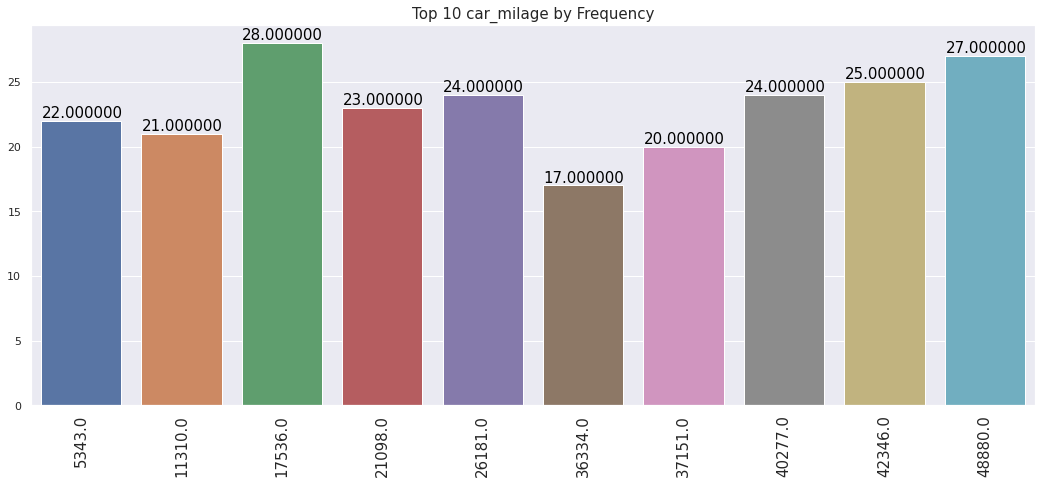

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x='VehMileage', y='Frequency', data=cars_mileage)
for p in graph.patches:
   graph.annotate('{:01f}'.format(p.get_height()),
    (p.get_x()+0.41, p.get_height()),
    ha='center',va='bottom',color='black', size= 15) 
plt.title('Top 10 car_milage by Frequency', size= 15)
plt.xticks(size = 15, rotation = 90)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
#car sold by vehicle years

car_years = train['VehYear'].value_counts().to_frame().reset_index()
car_years.columns = ['VehYear', 'CarMakModel']
car_years

,VehYear,CarMakModel
0,2018,2084
1,2017,1996
2,2015,1577
3,2016,506
4,2019,135


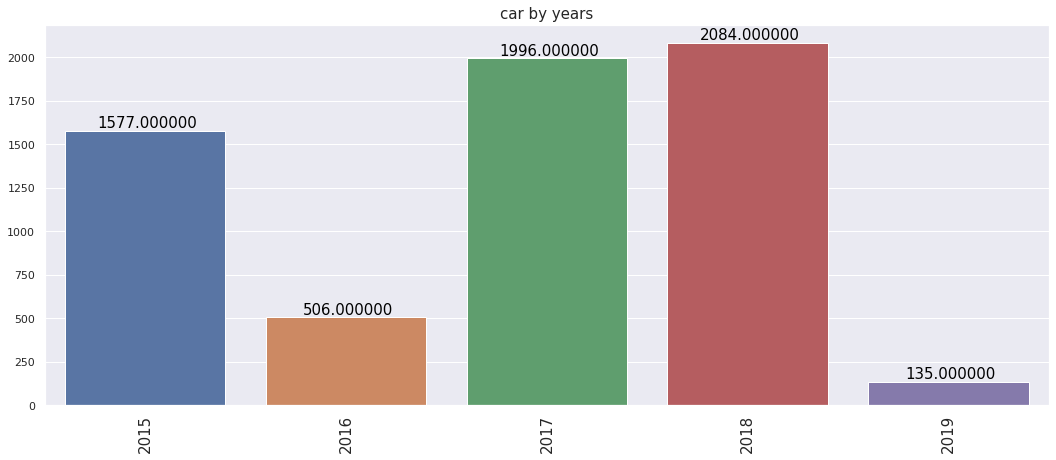

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x='VehYear', y='CarMakModel', data=car_years)
for p in graph.patches:
   graph.annotate('{:01f}'.format(p.get_height()),
    (p.get_x()+0.41, p.get_height()),
    ha='center',va='bottom',color='black', size= 15) 
plt.title('car by years', size= 15)
plt.xticks(size = 15, rotation = 90)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
fuel_type = train['VehFuel'].value_counts().to_frame().reset_index()
fuel_type.columns = ['VehFuel', 'Frequency']
fuel_type

,VehFuel,Frequency
0,Gasoline,5902
1,E85 Flex Fuel,343
2,Diesel,41
3,Unknown,10


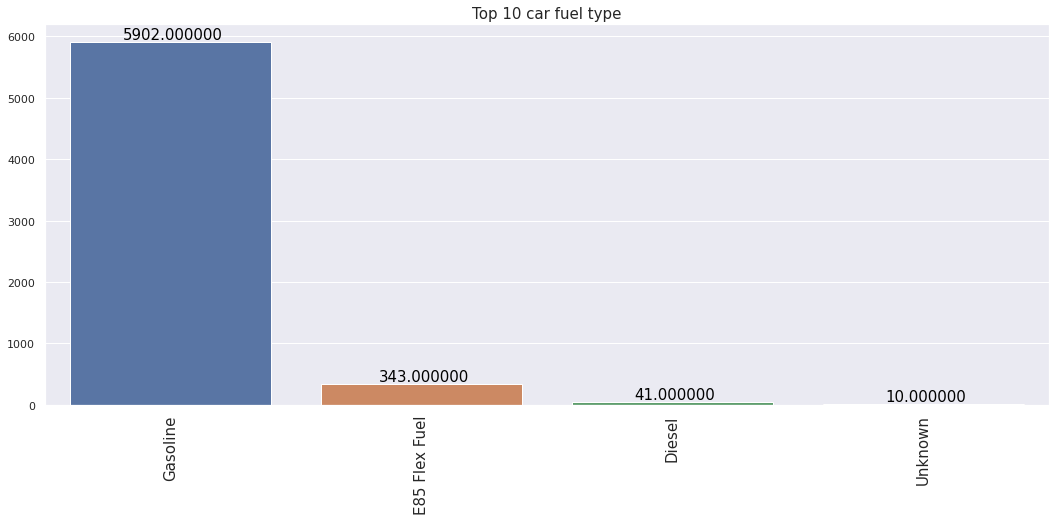

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x='VehFuel', y='Frequency', data=fuel_type)
for p in graph.patches:
   graph.annotate('{:01f}'.format(p.get_height()),
    (p.get_x()+0.41, p.get_height()),
    ha='center',va='bottom',color='black', size= 15) 
plt.title('Top 10 car fuel type', size= 15)
plt.xticks(size = 15, rotation = 90)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
#cars transmission
trans_type = train['VehTransmission'].value_counts().to_frame().reset_index().head(10)
trans_type.columns = ['VehTransmission', 'Cars']
trans_type

,VehTransmission,Cars
0,8-Speed Automatic,4395
1,8-Speed Automatic w/OD,676
2,Automatic,523
3,AUTOMATIC,103
4,8-Speed Shiftable Automatic,86
5,Automatic 8-Speed,72
6,8-SPEED A/T,64
7,8-Speed A/T,53
8,8-Speed Automatic (845RE),50
9,8-Speed,11


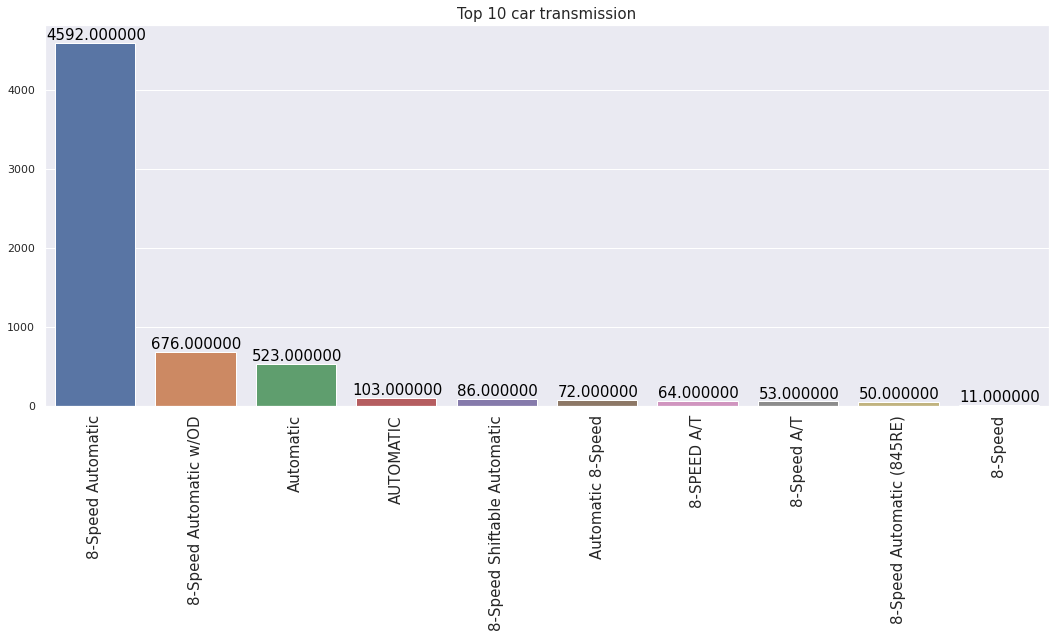

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x='VehTransmission', y='Cars', data=trans_type)
for p in graph.patches:
   graph.annotate('{:01f}'.format(p.get_height()),
    (p.get_x()+0.41, p.get_height()),
    ha='center',va='bottom',color='black', size= 15) 
plt.title('Top 10 car transmission', size= 15)
plt.xticks(size = 15, rotation = 90)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

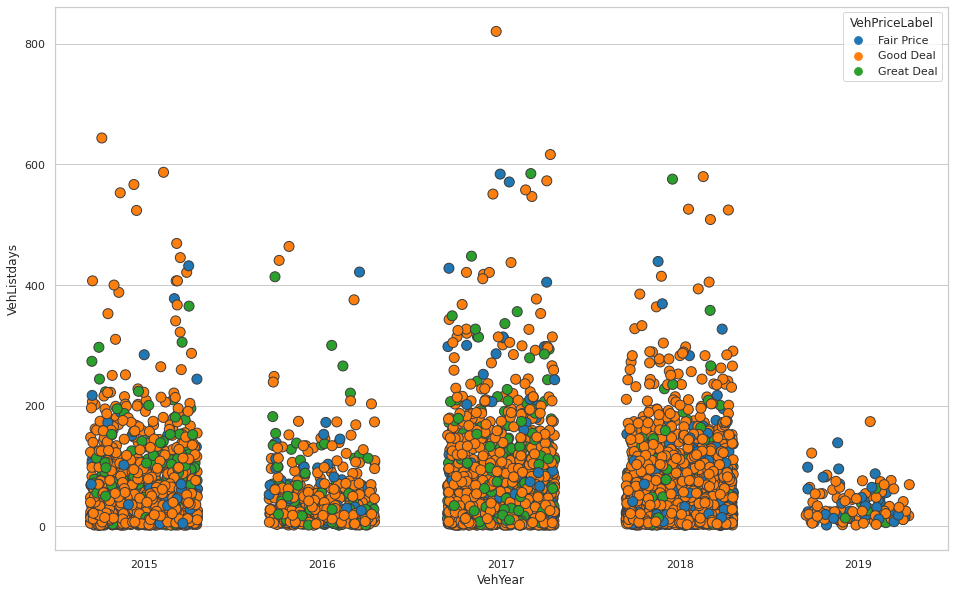

In [ ]:
plt.figure(figsize=(16,10))
sns.set_theme(style='whitegrid')
sns.stripplot(y=train.VehListdays, x = train.VehYear, hue = train.VehPriceLabel, palette='tab10',jitter=0.3, linewidth=1,size=10)

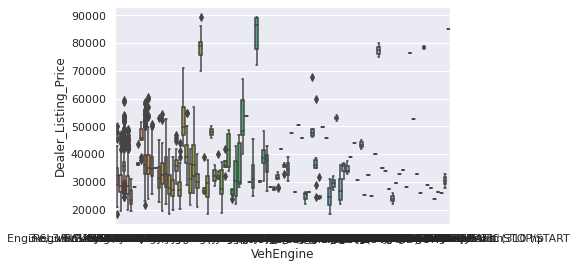

In [ ]:
ax = sns.boxplot(x='VehEngine', y='Dealer_Listing_Price', data=train)


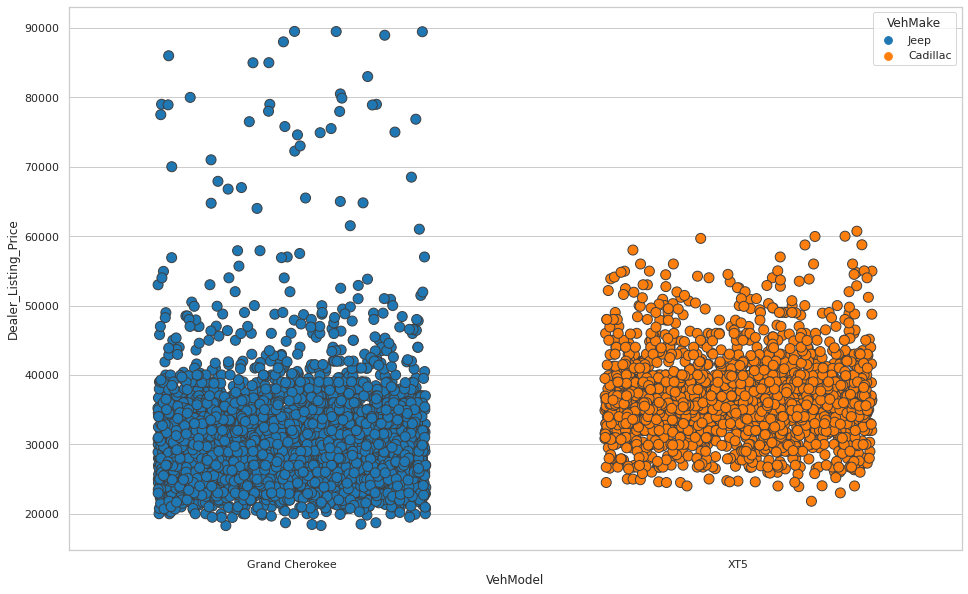

In [ ]:
plt.figure(figsize=(16,10))
sns.set_theme(style='whitegrid')
sns.stripplot(y=train.Dealer_Listing_Price, x = train.VehModel, hue = train.VehMake, palette='tab10',jitter=0.3, linewidth=1,size=10)

Looking at our graph, we see the cheapest price that Dealers listed for the models were XT5 2017 Model and most expensive model that were listed were 2019 and 2018 Grand Cherokee.
the relationsship remains the same that the cadilac starts at ~25k and max around 60k while the jeep 
goes for as high as 90k
 No significant difference if it was a Make or model for the price

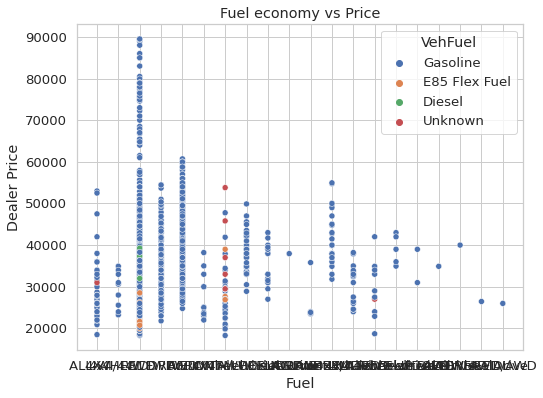

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=train['VehDriveTrain'],y=train['Dealer_Listing_Price'],hue=train['VehFuel'])
plt.xlabel('Fuel')
plt.ylabel('Dealer Price')

plt.show()
plt.tight_layout()

## Check for multicolinearity on numerical Data



1.   Correlation between independent variables




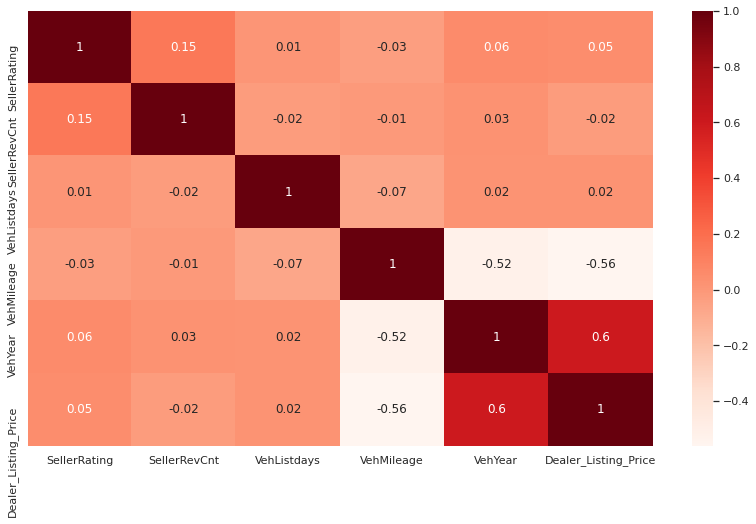

In [ ]:
#Using Pearson Correlation, this will only be visualize 
plt.figure(figsize=(14,8))
cor = train.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation coefficient has values between -1 to 1 — A value closer to 0 implies weaker correlation (exact 0 implying no correlation) — A value closer to 1 implies stronger positive correlation — A value closer to -1 implies stronger negative correlation.

Dealer listing price and the vehyear have a strong positive corellation, as the year determine the price.
The higher the mileage, the lower the price also so negative corelation

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Dealer_Listing_Price'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

VehMileage              0.56
VehYear                 0.60
Dealer_Listing_Price    1.00
Name: Dealer_Listing_Price, dtype: float64

multi colinarity detected as the year could determine the price or the mileage. One is redudant and needs to be remove

## Indepth Exploration of data

In [ ]:
#state car frequency 
cars = train['VehMake'].value_counts().to_frame().reset_index().head(10)
cars.columns = ['VehMake', 'Frequency']
cars

,VehMake,Frequency
0,Jeep,4199
1,Cadillac,2099


In [ ]:
#state car frequency 
model= train['VehModel'].value_counts().to_frame().reset_index().head(10)
model.columns = ['VehModel', 'Frequency']
model

,VehModel,Frequency
0,Grand Cherokee,4199
1,XT5,2099


In [ ]:
train['Vehicle_Trim'].value_counts()

Limited                             1912
Premium Luxury                       747
Laredo                               704
Luxury                               645
Overland                             381
Altitude                             325
Summit                               242
Trailhawk                            178
Base                                 159
Platinum                             131
High Altitude                         86
SRT                                   76
Luxury FWD                            53
FWD                                   49
Laredo E                              47
Premium Luxury FWD                    35
Trackhawk                             30
Sterling Edition                      26
Luxury AWD                            22
Platinum AWD                          13
Premium Luxury AWD                     9
75th Anniversary                       8
Limited 75th Anniversary Edition       5
Upland                                 3
SRT Night       

The vehicle trim has an ordinal values

In [ ]:
cars_model = train['VehModel'].value_counts().to_frame().reset_index().head(10)
cars_model.columns = ['VehModel', 'Frequency']
cars_model

,VehModel,Frequency
0,Grand Cherokee,4199
1,XT5,2099


In [ ]:
train.VehYear.unique()

array([2015, 2017, 2018, 2019, 2016])

In [ ]:
train.VehBodystyle.unique()

array(['SUV'], dtype=object)

In [ ]:
train.VehType.unique()

array(['Used'], dtype=object)

In [ ]:
round(((train[(train.SellerRating ==4.4)].Dealer_Listing_Price > 30000).sum()/36995)*100, 2)

0.29

29% of seller who sold a car over 30k had around 4.4 stars rating or so

In [ ]:
round(((train[(train.SellerRating ==4.9)].VehYear == 2018).sum()/775)*100,40)

33.67741935483871

Out of 775 sellers with 4.9 ratings, almost 33% sold 2018 models

## Concat Train/Test for Cleaning

In [241]:
#concat Train and test for cleaning
df = pd.concat([train,test],axis=0)

In [242]:
df.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,False,White,Black,4X4,3.6L V6,"['Adaptive Cruise Control', 'Antilock Brakes',...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",8.600069,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,True,Black,NaN,NaN,NaN,NaN,Gasoline,"1 Owner, Buyback Protection Eligible",2.920127,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0


In [159]:
#check nulls
df.isnull().any()

ListingID               False
SellerCity              False
SellerIsPriv            False
SellerListSrc            True
SellerName              False
SellerRating            False
SellerRevCnt            False
SellerState             False
SellerZip                True
VehBodystyle            False
VehCertified            False
VehColorExt              True
VehColorInt              True
VehDriveTrain            True
VehEngine                True
VehFeats                 True
VehFuel                  True
VehHistory               True
VehListdays              True
VehMake                 False
VehMileage               True
VehModel                False
VehPriceLabel            True
VehSellerNotes           True
VehType                 False
VehTransmission          True
VehYear                 False
Vehicle_Trim             True
Dealer_Listing_Price     True
dtype: bool

In [ ]:
#check if nans are eliminated
missing_values = pd.DataFrame({
    'Column': df.columns.values,
    '# of missing values': df.isna().sum().values,
    '% of missing values': 100 * df.isna().sum().values / len(df),
})

missing_values = missing_values[missing_values['# of missing values'] > 0]
print(missing_values.sort_values(by='# of missing values', 
                                 ascending=False
                                ).reset_index(drop=True))


                  Column  # of missing values  % of missing values
0           Vehicle_Trim                 1405            19.251850
1   Dealer_Listing_Price                 1052            14.414908
2            VehColorInt                  836            11.455193
3          VehDriveTrain                  465             6.371609
4              VehEngine                  419             5.741299
5          VehPriceLabel                  323             4.425870
6               VehFeats                  312             4.275144
7         VehSellerNotes                  284             3.891477
8             VehHistory                  228             3.124144
9        VehTransmission                  224             3.069334
10           VehColorExt                   80             1.096191
11            VehMileage                    3             0.041107
12         SellerListSrc                    2             0.027405
13             SellerZip                    2             0.02

# More inspection on Dataset for imbalance/ missing values  etc
The value counts give the frequency of each values in a specific column

In [ ]:
train.SellerZip.value_counts()

49037.0    101
55110.0     40
22182.0     39
60641.0     35
75209.0     33
          ... 
76301.0      1
27523.0      1
75160.0      1
49412.0      1
35967.0      1
Name: SellerZip, Length: 1828, dtype: int64

In [ ]:
train.SellerListSrc.value_counts()

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [ ]:
train.VehColorInt.value_counts()

Black                                                 3018
Jet Black                                              795
Shara Beige                                            263
Sahara Beige                                           209
Cirrus                                                 141
                                                      ... 
Graphite                                                 1
Ebony                                                    1
Cirrus w/Dark Titanium Accents w/Leather Seating S       1
Black / Ruby Red                                         1
Light Gray / Black                                       1
Name: VehColorInt, Length: 106, dtype: int64

In [ ]:
train.SellerListSrc.value_counts()

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [ ]:
train.VehMileage.unique()

array([39319., 30352., 38957., ..., 49000., 16278., 38146.])

In [ ]:
#car mileage, cars, group by price
tp = train.groupby('VehMileage')['Dealer_Listing_Price'].agg(['count','sum', 'mean','max']).reset_index()

tp.colums = ['Mileage', 'Cars', 'Total Price', 'Min Price','Avg Price', 'Max Price']
tp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,VehMileage,count,sum,mean,max
0,0.0,10,416352.0,41635.2,64998.0
1,1.0,1,19472.0,19472.0,19472.0
2,5.0,2,114499.0,57249.5,77970.0
3,6.0,4,167752.0,41938.0,52770.0
4,7.0,2,82977.0,41488.5,43978.0
...,...,...,...,...,...
5278,67566.0,1,27740.0,27740.0,27740.0
5279,69923.0,1,27990.0,27990.0,27990.0
5280,71202.0,1,27985.0,27985.0,27985.0
5281,72679.0,1,26333.0,26333.0,26333.0


In [ ]:
train.VehDriveTrain.value_counts()

4WD                                                           3836
FWD                                                           1093
AWD                                                            725
4X4                                                             52
Four Wheel Drive                                                41
FRONT-WHEEL DRIVE                                               35
ALL-WHEEL DRIVE                                                 27
Front Wheel Drive                                               20
All Wheel Drive                                                 19
4x4                                                             12
4x4/4-wheel drive                                               10
4x4/4WD                                                          9
AWD or 4x4                                                       6
All-wheel Drive                                                  5
Front-wheel Drive                                             

In [ ]:
train.VehFuel.describe()

count         6296
unique           4
top       Gasoline
freq          5902
Name: VehFuel, dtype: object

In [ ]:
train.VehEngine.describe()

count                      5937
unique                       96
top       3.6L V6 24V MPFI DOHC
freq                       1851
Name: VehEngine, dtype: object

In [ ]:
train.Vehicle_Trim.unique()

array(['High Altitude', nan, 'Laredo', 'Limited', 'Luxury', 'Limited 4x4',
       'Altitude', 'Overland', 'Premium Luxury', 'Base', 'Summit', 'FWD',
       'SRT', 'Luxury AWD', 'Trailhawk', 'Sterling Edition', 'Platinum',
       'Laredo E', 'Luxury FWD', 'Trackhawk', '75th Anniversary',
       'Premium Luxury FWD', 'Platinum AWD', 'SRT Night',
       'Limited 75th Anniversary Edition', '75th Anniversary Edition',
       'Limited 75th Anniversary', 'Premium Luxury AWD', 'Upland',
       'Limited X'], dtype=object)

since the Vehicle trim is ordinal, it will be encoded as the highest value depicting the highest dealer listing price.
upon more inspection, we see nans, which could yiel poor performance if not taken care of

In [ ]:
train.VehSellerNotes.head(3)

0                                                  NaN
1    Come take a look at our great pre-owned invent...
2    Backed by a rigorous 125-point inspection by f...
Name: VehSellerNotes, dtype: object

In [ ]:
# the seller notes will be explore for any interesting details 
train.VehSellerNotes.str.split(expand=True).stack().unique()

array(['Come', 'take', 'a', ..., '(419)625-1313', 'sketchy', 'Foster'],
      dtype=object)

the unique words are already used in the trim, car, make, model

In [ ]:
train.VehPriceLabel.value_counts()

Good Deal     4488
Great Deal     844
Fair Price     681
Name: VehPriceLabel, dtype: int64

In [ ]:
train.SellerName.str.split(expand=True).stack().value_counts()

Chrysler          1648
Jeep              1606
Dodge             1554
RAM               1014
Cadillac           934
                  ... 
Schoepp              1
Williams&#x27;       1
Sain                 1
Canton               1
Indian               1
Length: 2269, dtype: int64

this column will be dropped because, XT5 is not listed as top names, so could cause some overfitting for jeep

In [ ]:
	train.SellerListSrc.value_counts()

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [ ]:
n_by_state = train.groupby("SellerName")["SellerState"].unique()

n_by_state.head()

SellerName
 Clements Chevrolet Cadillac       [MN]
 Homan Chrysler Dodge Jeep RAM     [WI]
 Mataga Buick GMC Cadillac         [CA]
 Stephen Automall Centre           [CT]
21st Century Auto Sales            [ID]
Name: SellerState, dtype: object

In [ ]:
train.SellerName.str.split(expand=True).stack().unique()

array(['Prime', 'Motorz', 'Gateway', ..., 'Waschke', 'Abe', 'Foster'],
      dtype=object)

In [ ]:
train.VehFuel.unique()

array(['Gasoline', 'E85 Flex Fuel', 'Diesel', 'Unknown', nan],
      dtype=object)

In [ ]:
#vehicle features contain some interesting words to seller, so will leave
train.VehFeats.str.split(expand=True).stack().value_counts()

'Audio          8288
and             7313
Brakes',        5296
Control',       4225
Traction        3592
                ... 
Clearcoat,18       1
GROUP,',           1
SONAR',            1
S',                1
AMP                1
Length: 3140, dtype: int64

In [ ]:
train.VehFeats.str.split(expand=True).stack().unique()

array(["['Adaptive", 'Cruise', "Control',", ..., 'Anniversary', '(DISC)',
       "Includ',"], dtype=object)

The unique word doesn't give us much relationship with the price and the trim quality, thus the column will be dropped, as the top words were audio, which is common

In [ ]:

train.SellerName.str.split(expand=True).stack().value_counts()

Chrysler          1648
Jeep              1606
Dodge             1554
RAM               1014
Cadillac           934
                  ... 
Schoepp              1
Williams&#x27;       1
Sain                 1
Canton               1
Indian               1
Length: 2269, dtype: int64

## Drop Redundant Variables and Aggregate Essentials

In [243]:
df["CarMakeModel"] = df["VehMake"]+" "+ df["VehModel"]


In [244]:
# shift column 'Name' to first position
first_column = df.pop('CarMakeModel')

# first_column) function
df.insert(3, 'CarMakeModel', first_column)

In [245]:
df.drop(columns=['VehMake','VehModel'], axis=1, inplace=True )

In [246]:
df.head(2)

,ListingID,SellerCity,SellerIsPriv,CarMakeModel,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehListdays,VehMileage,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Jeep Grand Cherokee,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,False,White,Black,4X4,3.6L V6,"['Adaptive Cruise Control', 'Antilock Brakes',...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",8.600069,39319.0,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac XT5,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,True,Black,NaN,NaN,NaN,NaN,Gasoline,"1 Owner, Buyback Protection Eligible",2.920127,30352.0,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0


In [247]:
#change zip to string
df['VehYear'] = df['VehYear'].astype(str)

In [248]:
df["CarYearMakeModel"] = df["VehYear"]+" "+ df["CarMakeModel"]


In [249]:
# shift column 'Name' to first position
first_column = df.pop('CarYearMakeModel')

# first_column) function
df.insert(3, 'CarYearMakeModel', first_column)

In [250]:
df.drop(columns=['CarMakeModel'], axis=1, inplace=True )

In [251]:
df.head(3)

,ListingID,SellerCity,SellerIsPriv,CarYearMakeModel,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehListdays,VehMileage,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,2015 Jeep Grand Cherokee,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,False,White,Black,4X4,3.6L V6,"['Adaptive Cruise Control', 'Antilock Brakes',...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",8.600069,39319.0,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,2017 Cadillac XT5,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,True,Black,NaN,NaN,NaN,NaN,Gasoline,"1 Owner, Buyback Protection Eligible",2.920127,30352.0,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,2015 Jeep Grand Cherokee,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,True,Brilliant Black Crystal Pearlcoat,Black,4x4/4WD,Regular Unleaded V-6 3.6 L/220,['18 WHEEL &amp; 8.4 RADIO GROUP-inc: Nav-Capa...,Gasoline,"1 Owner, Buyback Protection Eligible",28.107014,38957.0,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0


In [169]:
df.drop('VehCertified', axis=1, inplace=True)

In [172]:
df.drop('SellerIsPriv', axis=1, inplace=True)


In [252]:
df.drop('VehBodystyle', axis=1, inplace=True)

In [253]:
df.drop('VehSellerNotes', axis=1, inplace=True)
df.drop('VehHistory', axis=1, inplace=True)
df.drop('VehFeats', axis=1, inplace=True)
df.drop('VehType', axis=1, inplace=True)

these features are redudant in a way

In [254]:
df.head(2)

,ListingID,SellerCity,SellerIsPriv,CarYearMakeModel,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFuel,VehListdays,VehMileage,VehPriceLabel,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,2015 Jeep Grand Cherokee,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,False,White,Black,4X4,3.6L V6,Gasoline,8.600069,39319.0,Fair Price,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,2017 Cadillac XT5,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,True,Black,NaN,NaN,NaN,Gasoline,2.920127,30352.0,Good Deal,NaN,2017,NaN,34860.0


In [255]:
#unknown mileage could be drop because outliers
index_names = df[df['VehFuel'] == 'Unknown'].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)
  

In [256]:
df = df.drop('VehColorInt', axis=1)


Huge missing data thus could cause outliers

In [257]:
df.drop('SellerListSrc', axis=1, inplace=True)


In [ ]:
df.drop('SellerName', axis=1, inplace=True)


In [ ]:
df.drop('SellerCity', axis=1, inplace=True)

In [261]:
df.drop('VehYear', axis=1, inplace=True)

In [265]:
df.head(2)

,ListingID,SellerCity,SellerIsPriv,CarYearMakeModel,Address,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehCertified,VehColorExt,VehDriveTrain,VehEngine,VehFuel,VehListdays,VehMileage,VehPriceLabel,VehTransmission,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,2015 Jeep Grand Cherokee,MI Warren 48091.0,Prime Motorz,5.0,32,MI,48091.0,False,White,4X4,3.6L V6,Gasoline,8.600069,39319.0,Fair Price,Automatic 8-Speed,High Altitude,30990.0
1,3920,Fargo,False,2017 Cadillac XT5,ND Fargo 58103.0,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,True,Black,NaN,NaN,Gasoline,2.920127,30352.0,Good Deal,NaN,NaN,34860.0


In [259]:
#change zip to string
df['SellerZip'] = df['SellerZip'].astype(str)

In [260]:
df["Address"] = df["SellerState"]+" "+ df["SellerCity"]+" "+ df["SellerZip"]

In [264]:
# shift column 'Name' to first position
first_column = df.pop('Address')

# first_column) function
df.insert(4, 'Address', first_column)

In [266]:
df.drop('SellerZip', axis=1, inplace=True)


In [267]:
df.drop('SellerState', axis=1, inplace=True)

In [268]:
df.drop('SellerCity', axis=1, inplace=True)

In [ ]:
#df.drop('Dealer_Listing_Price', axis=1, inplace=True)

In [269]:
df.head(2)

,ListingID,SellerIsPriv,CarYearMakeModel,Address,SellerName,SellerRating,SellerRevCnt,VehCertified,VehColorExt,VehDriveTrain,VehEngine,VehFuel,VehListdays,VehMileage,VehPriceLabel,VehTransmission,Vehicle_Trim,Dealer_Listing_Price
0,3287,False,2015 Jeep Grand Cherokee,MI Warren 48091.0,Prime Motorz,5.0,32,False,White,4X4,3.6L V6,Gasoline,8.600069,39319.0,Fair Price,Automatic 8-Speed,High Altitude,30990.0
1,3920,False,2017 Cadillac XT5,ND Fargo 58103.0,Gateway Chevrolet Cadillac,4.8,1456,True,Black,NaN,NaN,Gasoline,2.920127,30352.0,Good Deal,NaN,NaN,34860.0


## Encode Categorical Variables/Fill Missing Values

In [270]:
# craete AN INPUTS OF NUMERICAL COLUMNS
numerical = [var for var in df.columns if df[var].dtype == float]




numerical

['SellerRating', 'VehListdays', 'VehMileage', 'Dealer_Listing_Price']

In [271]:
#replace missing numerical with the mean
for n_col in numerical:
    df[n_col] = df[n_col].fillna(df[n_col].mean())


In [272]:
# create AN INPUTS OF Categorical COLUMNS
categorical = [var for var in df.columns if df[var].dtype == 'O']

categorical

['CarYearMakeModel',
 'Address',
 'SellerName',
 'VehColorExt',
 'VehDriveTrain',
 'VehEngine',
 'VehFuel',
 'VehPriceLabel',
 'VehTransmission',
 'Vehicle_Trim']

In [273]:
#replace missing numerical with the mode
for c_col in categorical:
    df[c_col] = df[c_col].fillna(df[c_col].mode().to_numpy()[0])


In [274]:
# create AN INPUTS OF Categorical COLUMNS
other = [var for var in df.columns if df[var].dtype == int]

other


['ListingID', 'SellerRevCnt']

In [275]:
for n_col in other:
    df[n_col] = df[n_col].fillna(df[n_col].mean())

In [276]:
#recheck if nans are eliminated
missing_values = pd.DataFrame({
    'Column': df.columns.values,
    '# of missing values': df.isna().sum().values,
    '% of missing values': 100 * df.isna().sum().values / len(df),
})

missing_values = missing_values[missing_values['# of missing values'] > 0]
print(missing_values.sort_values(by='# of missing values', 
                                 ascending=False
                                ).reset_index(drop=True))


Empty DataFrame
Columns: [Column, # of missing values, % of missing values]
Index: []


In [277]:
df.head(2)

,ListingID,SellerIsPriv,CarYearMakeModel,Address,SellerName,SellerRating,SellerRevCnt,VehCertified,VehColorExt,VehDriveTrain,VehEngine,VehFuel,VehListdays,VehMileage,VehPriceLabel,VehTransmission,Vehicle_Trim,Dealer_Listing_Price
0,3287,False,2015 Jeep Grand Cherokee,MI Warren 48091.0,Prime Motorz,5.0,32,False,White,4X4,3.6L V6,Gasoline,8.600069,39319.0,Fair Price,Automatic 8-Speed,High Altitude,30990.0
1,3920,False,2017 Cadillac XT5,ND Fargo 58103.0,Gateway Chevrolet Cadillac,4.8,1456,True,Black,4WD,3.6L V6 24V MPFI DOHC,Gasoline,2.920127,30352.0,Good Deal,8-Speed Automatic,Limited,34860.0


## Train/ Test Evaluation

In [203]:
#This was for the Categorical prediction

categorical_data = [ 'CarYearMakeModell'	,'Address','SellerName', 'VehTransmission','VehPriceLabel','VehFuel','VehEngine', 'VehColorExt','VehDriveTrain']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = df[categorical_data].apply(encoder.fit_transform)
df.drop(categorical_data,axis=1, inplace=True)
df = pd.concat([encoded,df], axis=1)
df.head(10)


,CarYearMakeModell,Address,SellerName,VehTransmission,VehPriceLabel,VehFuel,VehEngine,VehColorExt,VehDriveTrain,ListingID,SellerRating,SellerRevCnt,VehListdays,VehMileage,Vehicle_Trim,Dealer_Listing_Price
0,0,910,2030,26,0,2,17,175,3,3287,5.0,32,8.600069,39319.0,High Altitude,30990.0
1,2,1123,1104,12,1,2,19,12,1,3920,4.8,1456,2.920127,30352.0,Limited,34860.0
2,0,2007,2636,16,1,2,76,31,6,4777,4.8,1405,28.107014,38957.0,Laredo,23249.0
3,5,1034,577,25,1,2,17,76,1,6242,4.4,21,59.816875,20404.0,Limited,31977.0
4,4,25,2378,12,1,2,68,129,16,7108,3.7,74,98.665301,19788.0,Luxury,33495.0
5,5,1231,1945,12,1,2,19,8,1,10882,3.0,51,30.967500,34649.0,Limited,27900.0
6,3,479,2273,12,1,2,19,166,1,12013,3.5,17,194.482338,48814.0,Laredo,22989.0
7,5,412,1543,12,2,2,19,131,1,12334,4.6,240,28.849537,29095.0,Limited,28793.0
8,5,753,1010,16,2,2,76,163,1,12460,3.7,72,74.204248,26395.0,Limited 4x4,30493.0
9,5,654,714,12,1,2,19,25,1,13173,4.8,774,6.731481,17692.0,Limited,36500.0


In [278]:
#Dealer Listing Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = df[categorical].apply(encoder.fit_transform)
df.drop(categorical,axis=1, inplace=True)
df = pd.concat([encoded,df], axis=1)
df.head(10)

,CarYearMakeModel,Address,SellerName,VehColorExt,VehDriveTrain,VehEngine,VehFuel,VehPriceLabel,VehTransmission,Vehicle_Trim,ListingID,SellerIsPriv,SellerRating,SellerRevCnt,VehCertified,VehListdays,VehMileage,Dealer_Listing_Price
0,0,910,2030,175,3,17,2,0,26,5,3287,False,5.0,32,False,8.600069,39319.0,30990.0
1,2,1123,1104,12,1,19,2,1,12,8,3920,False,4.8,1456,True,2.920127,30352.0,34860.0
2,0,2007,2636,31,6,76,2,1,16,6,4777,False,4.8,1405,True,28.107014,38957.0,23249.0
3,5,1034,577,76,1,17,2,1,25,8,6242,False,4.4,21,False,59.816875,20404.0,31977.0
4,4,25,2378,129,16,68,2,1,12,13,7108,False,3.7,74,False,98.665301,19788.0,33495.0
5,5,1231,1945,8,1,19,2,1,12,8,10882,False,3.0,51,False,30.967500,34649.0,27900.0
6,3,479,2273,166,1,19,2,1,12,6,12013,False,3.5,17,False,194.482338,48814.0,22989.0
7,5,412,1543,131,1,19,2,2,12,8,12334,False,4.6,240,False,28.849537,29095.0,28793.0
8,5,753,1010,163,1,76,2,2,16,9,12460,False,3.7,72,True,74.204248,26395.0,30493.0
9,5,654,714,25,1,19,2,1,12,8,13173,False,4.8,774,False,6.731481,17692.0,36500.0


## Prediction for Dealer Listing Price

In [279]:
#Divide Data
new_train = df.iloc[:6228,:]
new_test = df.iloc[6228:,:]

In [281]:
x = new_train.drop(['Dealer_Listing_Price'], axis=1)
y = new_train['Dealer_Listing_Price']

In [282]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.14, random_state=42) # 75% training and 25% test

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix


mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)




In [284]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [285]:
from sklearn.metrics import mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=3000, criterion='mse', n_jobs=-1, oob_score=True)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)



In [286]:
# R squared
print('\nVariance score (R squared): %.2f' % r2_score(y_test, rf_pred))
 


Variance score (R squared): 0.89


In [287]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, rf_pred))
 
print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(y_test, rf_pred)) )
 
print("\nMean of house price target variable = ",y_test.mean())
 
print("RMSE percentage of house mean = ", \
      100 * np.sqrt( mean_squared_error(y_test, rf_pred))/y_test.mean())


Mean squared error: 5325852.76
Root mean squared error: 2307.78

Mean of house price target variable =  31870.57383106967
RMSE percentage of house mean =  7.241102493261232


In [288]:
# Fit Random Forest on Training Set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)

# Score model
regressor.score(X_train, y_train)

0.9825432164615374

In [289]:
regressor.score(X_test, y_test)

0.8852657021429441

In [290]:
regressor.predict(X_test)

array([21724.51666667, 28381.05333333, 26567.39666667, 33414.41      ,
       23522.46      , 32075.25      , 34785.27      , 33343.50666667,
       35450.12666667, 39377.00880051, 34090.00366795, 39183.59246846,
       45981.26      , 29672.71666667, 24958.68666667, 27184.48      ,
       27908.15666667, 26515.95666667, 32132.14913513, 30375.09666667,
       39704.68700128, 24817.97      , 26666.56666667, 39678.19793564,
       38136.55213385, 38497.2446718 , 39761.03820077, 32046.87666667,
       29944.63333333, 36901.31      , 29522.16033462, 30941.75666667,
       30318.10366795, 32903.25333333, 28033.85666667, 31382.99333333,
       41351.37066923, 30641.93666667, 36278.15666667, 27680.02333333,
       36639.93333333, 32367.58486744, 29490.46940026, 21499.67      ,
       32787.43333333, 35456.01033462, 40464.82      , 38653.39093436,
       39507.59486744, 36516.45273359, 26675.85      , 35873.42666667,
       34383.15940026, 33880.19333333, 23013.38333333, 33968.52520205,
      

In [291]:
from sklearn import metrics

rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train,y_train)
test_pred = rf_regressor.predict(X_test)
train_pred = rf_regressor.predict(X_train)


print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)




Test set evaluation:

MAE: 1511.9779571487836
MSE: 5397359.928641926
RMSE: 2323.22188536565
R2 Square 0.8843649801226814
******************************
Train set evaluation:

MAE: 604.8292268584539
MSE: 1010772.6870103712
RMSE: 1005.371914771032
R2 Square 0.9825447964787235


In [292]:
imp = rf_regressor.feature_importances_

In [293]:
combo = pd.Series(imp, X_train.columns)

In [294]:
combo

CarYearMakeModel    0.149925
Address             0.012616
SellerName          0.015750
VehColorExt         0.008896
VehDriveTrain       0.012500
VehEngine           0.041011
VehFuel             0.000381
VehPriceLabel       0.077981
VehTransmission     0.006657
Vehicle_Trim        0.444888
ListingID           0.011451
SellerIsPriv        0.000044
SellerRating        0.007293
SellerRevCnt        0.013727
VehCertified        0.008462
VehListdays         0.022021
VehMileage          0.166397
dtype: float64

Text(0.5, 1.0, 'feature importance visualization')

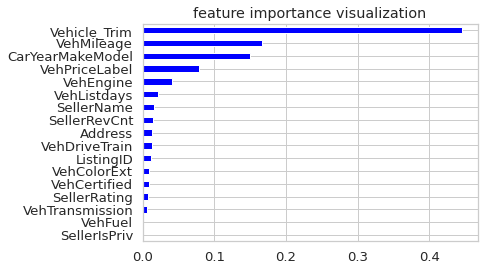

In [295]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(6,4))
combo.sort_values().plot.barh(color='blue')
plt.title('feature importance visualization')

i will join the column on the Dealer price

Trim here is an indicator of the price

In [296]:
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix


mlr = linear_model.LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)


In [297]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [298]:
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [299]:
from sklearn import linear_model
BayReg = linear_model.BayesianRidge()
BayReg.fit(X_train,y_train)
BayReg.score(X_test,y_test)
bay_pred = BayReg.predict(X_test)
bay_score = BayReg.score(X_test,y_test)
expl_bay = explained_variance_score(bay_pred,y_test)

In [308]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
#5 Predicting a new result
svr_pred = svr.predict(X_test)
svr_score = svr.score(X_test, y_test)
expl_svr = explained_variance_score(svr_pred,y_test)

In [313]:
print("Multiple Linear Regression Model Score is ",round(regressor.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))
print("Bayesian Regression Model Score is ",round(BayReg.score(X_test,y_test)*100))
print("SVR Regression Model Score is ",round(svr.score(X_test,y_test)*100))
#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression', 'Bayesian Regression', 'SVR Regression'],
                            'Score':[mlr_score,decision_score,rf_score, bay_score, svr_score],
                            'Explained Variance Score':[expl_mlr, expl_tr, expl_rf, expl_bay, expl_svr]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  89
Decision tree  Regression Model Score is  76
Random Forest Regression Model Score is  89
Bayesian Regression Model Score is  65
SVR Regression Model Score is  0


,Model,Score,Explained Variance Score
2,Random forest Regression,0.886819,0.876972
1,Decision Tree,0.764130,0.776496
3,Bayesian Regression,0.654587,0.578715
0,Multiple Linear Regression,0.654296,0.580161
4,SVR Regression,-0.002439,-101097.290393


random forest has a higher variance

In [229]:
final_test=new_test.copy()

In [310]:
X = new_test.drop(['Dealer_Listing_Price'], axis=1)
Y = new_test[['Dealer_Listing_Price']]

In [314]:
final_test['Dealer_Listing_Price'] = rf_regressor.predict(X)
final_test['ListingID'] = new_test['ListingID']

logistic_submission = final_test[['ListingID','Vehicle_Trim','Dealer_Listing_Price']]

logistic_submission.to_csv("prediction.csv", index=False)

logistic_submission.tail()

,ListingID,Vehicle_Trim,Dealer_Listing_Price
995,9992442,Limited,29873.250000
996,9993562,Limited,31806.806402
997,9994646,Limited,40309.630000
998,9997199,Limited,38735.700000
999,9999562,Limited,39573.630000


I chose Random Forest because it had a higher variance than the mutiple linear regression

## Prediction for Trim

In [205]:
x = new_train.drop(['Vehicle_Trim'], axis=1)
y = new_train['Vehicle_Trim']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # 75% training and 25% test

In [207]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train, y_train)
blf_score = clf2.score(X_test,y_test)
pred_clf = clf2.predict(X_test)

print(pred_clf)
print(blf_score)

['Laredo' 'Limited' 'Overland' ... 'Luxury' 'Base' 'Summit']
0.6795118818240206


In [209]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
clf_score = clf.score(X_test,y_test)
print(clf.predict(X_test))
print(clf_score)

['Laredo' 'Limited' 'Overland' ... 'Premium Luxury' 'Luxury' 'Limited']
0.5915221579961464


In [211]:
rfc = RandomForestClassifier(n_jobs=-1).fit(X_train,y_train)
pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
print(' random forest accuracy score' , score)



 random forest accuracy score 0.7514450867052023


In [223]:

models_score =pd.DataFrame({'Model':['Decision Tree Classifier','Naive Bayes Classifier','Random forest Classification'],
                            'Score':[blf_score,clf_score, score],
                       
                           })
models_score.sort_values(by='Score',ascending=False)

,Model,Score
2,Random forest Classification,0.751445
0,Decision Tree Classifier,0.679512
1,Naive Bayes Classifier,0.591522


In [224]:
final_test_new =new_test.copy()

In [235]:
X = new_test.drop(['Vehicle_Trim'], axis=1)
Y = new_test[['Vehicle_Trim']]

In [236]:
final_test_new['Vehicle_Trim'] = rfc.predict(X)
final_test_new['ListingID'] = new_test['ListingID']

final_submission = final_test[['ListingID','Vehicle_Trim']]

final_submission.to_csv("submission.csv", index=False)

final_submission.tail()

,ListingID,Vehicle_Trim
995,9992442,Limited
996,9993562,Limited
997,9994646,Limited
998,9997199,Limited
999,9999562,Limited


In [238]:
#merge two csv

data1 = pd.read_csv('/content/submission.csv') 
data2 = pd.read_csv('/content/submission_Dealer.csv')
output = pd.merge(data1, data2, on='ListingID',  how='inner')
                  
                  

In [239]:
output

,ListingID,Vehicle_Trim,Dealer_Listing_Price
0,8528593,Premium Luxury FWD,36724.89
1,8529292,Premium Luxury,37161.90
2,8529444,Limited,30225.72
3,8530365,Premium Luxury,35867.03
4,8531843,Trailhawk,41735.48
...,...,...,...
1052,9992442,Limited,29462.32
1053,9993562,Limited,32909.45
1054,9994646,Limited,39275.49
1055,9997199,Limited,38006.45


In [240]:
output.to_csv('final_sumission.csv',index=False)
output.tail()

,ListingID,Vehicle_Trim,Dealer_Listing_Price
1052,9992442,Limited,29462.32
1053,9993562,Limited,32909.45
1054,9994646,Limited,39275.49
1055,9997199,Limited,38006.45
1056,9999562,Limited,39566.77


Data are merge from the two csv based on the ID

## Conclusion



This excercise and the predictions made me understand the key concept of thoroughly knowing your data. Understanding bias, variance tradeoff, multicolinarity and what algorithms are best used in such scenarios.

Understanding the data took linger time for me, as I had no knowledge in cars or trims etc.

Understanding the different characteristics of the data also help in making a decision as to whether a features needs to be drop, concatenated to avoid huge dimension, which could yied inaccuracies.

Various algorithms were incorporated for best results and random forest prove to be the most optimal of all. 

Decisoin tree classifier was used for the Vehicle trim, but I found out that it makes much more sense to add the Vehicle trim Column to the Dealer price prediction, as the feature importance prove that the Trim was highly corelated with the price.